In [1]:
%load_ext dotenv
%dotenv
import os

SN_API_HOST = os.getenv('SN_API_HOST')
SN_API_KEY = os.getenv('SN_API_KEY')

In [2]:
from signals_notebook.api import SignalsNotebookApi

SignalsNotebookApi.init(SN_API_HOST, SN_API_KEY)

In [3]:
from signals_notebook.entities import EntityStore

experiment = EntityStore.get("experiment:f7fb12b2-1180-4fa0-9bcd-ccc2f7ec0e8f")


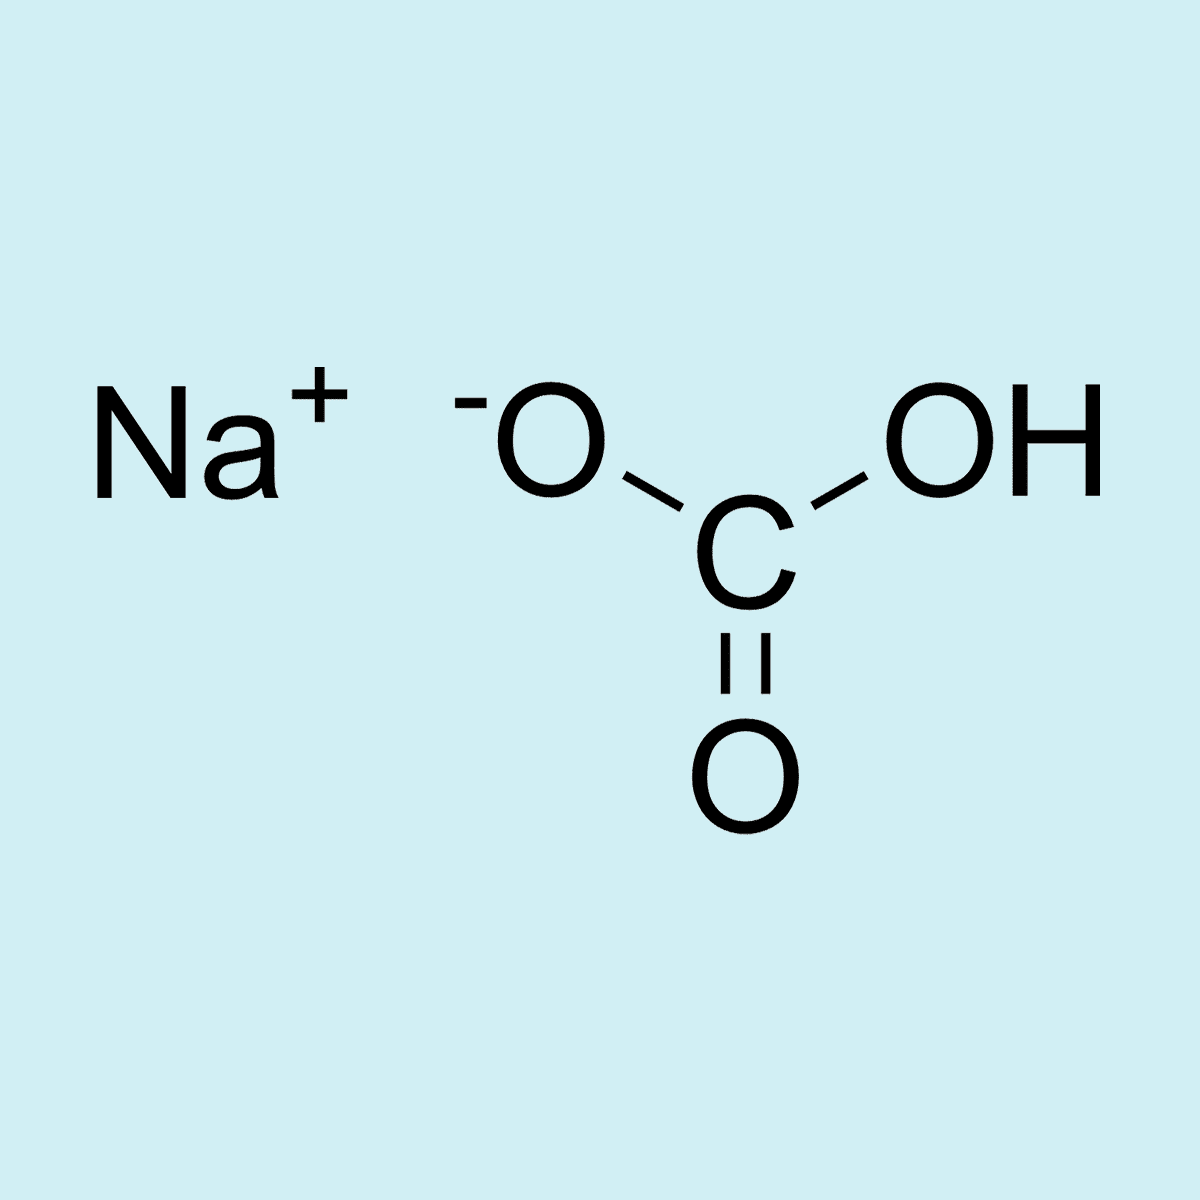

In [4]:
import warnings # added to ignore deprecation warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML

experiment_html = experiment.get_html()
display(HTML(data=experiment_html))  # pycharm cannot display html correctly. Use web version to see html response.

In [5]:
with open('test_file.html', 'w') as f:
    f.write(experiment_html)

In [6]:
!pip install pdfkit
# sudo apt-get install wkhtmltopdf / or check documentation https://wkhtmltopdf.org/downloads.html
# set wkhtmltopdf to your PATH (for windows)

You should consider upgrading via the 'C:\coding\pesn-python-sdk\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import pdfkit

try:
    config = pdfkit.configuration(wkhtmltopdf='YOUR SYSTEM PATH/wkhtmltopdf/bin/wkhtmltopdf.exe')
    pdfkit.from_string(experiment_html, 'sample.pdf', configuration=config)
except OSError:
    print('Not presented in PATH')

Not presented in PATH


In [8]:
experiment.get_children()

[Text(type=<EntityType.TEXT: 'text'>, eid='text:150d47cc-b724-4bc8-aec5-276f9537d4b3', digest='83482819', name='Test', description='', created_at=datetime.datetime(2022, 2, 10, 14, 16, 28, 254000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 3, 10, 14, 15, 11, 805000, tzinfo=datetime.timezone.utc)),
 Text(type=<EntityType.TEXT: 'text'>, eid='text:2e8b503e-714a-412d-bc60-49f8fb41539b', digest='11414164', name='Auto', description='', created_at=datetime.datetime(2022, 2, 13, 9, 59, 52, 449000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 2, 13, 10, 10, 21, 409000, tzinfo=datetime.timezone.utc)),
 ChemicalDrawing(type=<EntityType.CHEMICAL_DRAWING: 'chemicalDrawing'>, eid='chemicalDrawing:2fc7a20f-e74c-4142-b4fa-cfa2fab41c58', digest='60887038', name='ChemDraw Document', description='', created_at=datetime.datetime(2022, 2, 13, 13, 19, 50, 766000, tzinfo=datetime.timezone.utc), edited_at=datetime.datetime(2022, 5, 10, 13, 34, 43, 30000, tzinfo=dateti

In [9]:
experiment.stoichiometry

[Stoichiometry(eid='chemicalDrawing:2fc7a20f-e74c-4142-b4fa-cfa2fab41c58', reactants=Reactants(__root__=[Reactant(row_id='10', rxnid=Cell(value='I', display='', units=None), name=Cell(value='HCl', display='', units=None), cas=Cell(value='7647-01-0', display='', units=None), formula=Cell(value='ClH', display='', units=None), mf=Cell(value=Decimal('36.46'), display='36.46 g/mol', units='g/mol'), mw=Cell(value=Decimal('36.46'), display='36.46 g/mol', units='g/mol'), em=Cell(value=Decimal('35.97668'), display='35.97668', units=None), limit=Cell(value=True, display='', units=None), eq=Cell(value=True, display='1', units=None), sm=None, moles=None, loading=None, molarity=None, volume=None, density=Cell(value=Decimal('1.49'), display='1.490 g/ml', units='g/mL'), wt=None, supplier=None, lot=None, iupac_name=Cell(value='hydrogen chloride', display='', units=None), barcode=None, material_id=None, container_id=None, inchi='InChI=1S/ClH/h1H', hash='da873297923efb8e6452ccf77bc0701b6add1e9507b261004

In [10]:
from signals_notebook.entities import Experiment

notebook = EntityStore.get('journal:111a8a0d-2772-47b0-b5b8-2e4faf04119e')
experiment = Experiment.create(
    name='Example experiment created by SDK',
    description='Delete if you see this in UI',
    notebook=notebook,
)

In [11]:
EntityStore.delete(experiment.eid)